In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [25]:
X, y = make_blobs?

In [ ]:
X, y = make_blobs

In [106]:
X, y = make_blobs(1000, centers=2, random_state=42)

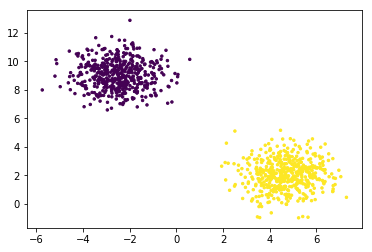

In [107]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=6, c=y)
plt.show()

In [108]:
class KNN:
    
    def __init__(self, k=10):
        self.k = k
        self.X = None
        self.y = None
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict_point(self, point):
        
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(x_item, point)
            distances.append((dis, y_item))
            
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        return (vals[np.argmax(counts)])
        
    def predict(self, X):
        outs = [] 
        for point in X:
            outs.append(self.predict_point(point))  
        return np.array(outs, dtype=int)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
    
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1-p2)**2)

In [109]:
prop = .7
items = int(X.shape[0] * prop)
X_train = X[:items]
y_train = y[:items]

X_test = X[items:]
y_test = y[items:]

In [110]:
model = KNN(4)

In [111]:
model.fit(X_train, y_train)

In [112]:
model.score(X_test, y_test)

1.0